len(samples)=2000 len(integrated)=2000
samples: 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0... max 1 avg 0 n 2000
integra: 0 1 2 3 4 5 6 7 8 9 10 12 14 16 18 20 22 24 26 28 30 33 3... max 200800 avg 67117 n 2000
decimat: 0 24 76 156 266 405 572 768 994 1248 1530 1843 2184 2553 ... max 198801 avg 66715 n 118
combed : 0 24 28 28 30 29 28 29 30 28 28 31 28 28 30 29 28 29 30 2... max 31 avg 29 n 118
len(im.integrated)=2000


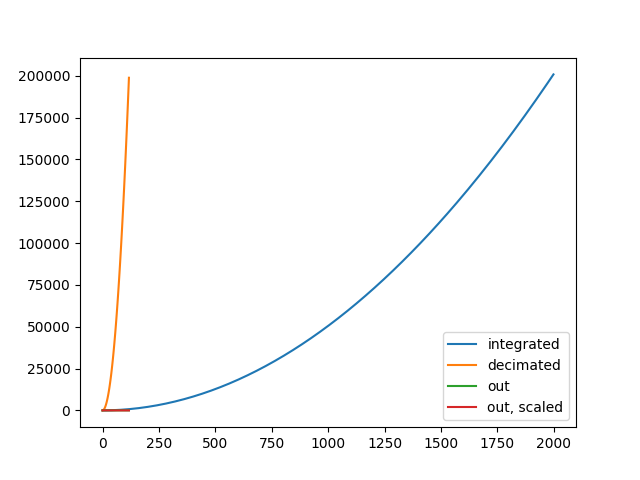

In [40]:
%matplotlib widget
from collections import namedtuple
import importlib
import matplotlib.pyplot as plt
import numpy as np

import cic
importlib.reload(cic)
from cic import CICDecimator

def ss(s):
    sss = ' '.join(str(round(x)) for x in s)
    if len(sss) > 60:
        sss = sss[:57] + '...'
    sss += f' max {max(s)}'
    sss += f' avg {round(sum(s) / len(s))}'
    sss += f' n {len(s)}'
    return sss

R, M, N = 17, 1, 2
cic = CICDecimator(R, M, N)
ns = 2000
samples = [0] * ns
samples[1::20] = [+1] * (ns // 20)
samples[11::20] = [+1] * (ns // 20)
out = cic.process(samples)
im = cic.intermediates
for (f, fname) in zip(im, im._fields):
    print(f'{fname:7.7}: {ss(f)}')


fig = plt.figure()
print(f'{len(im.integrated)=}')
plt.plot(im.integrated, label='integrated')
plt.plot(im.decimated, label='decimated')
plt.plot(out, label='out')
plt.plot(np.array(out) / (R * M)**N, label='out, scaled')
# plt.plot((np.array(combed) - np.array(decimated)) - 50)
plt.legend()
None